### Learning Objectives

- Matplotlib basics syntax;
- Customizing a figure;
- Understanding the `figure`, `axes` and how to create `subplots`;
- Plotting using matplotlib wrappers (pandas, xarray, etc).

![](https://holoviz.org/assets/landscape_hv_nx.png)

### Basic matplotlib

![](data/mpl_anatomy.png)

In [1]:
# Try qt5 or notebook later.
# You'll have to restart the kernel first!
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
import matplotlib


matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

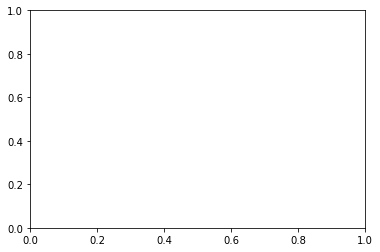

In [4]:
ax = plt.axes()

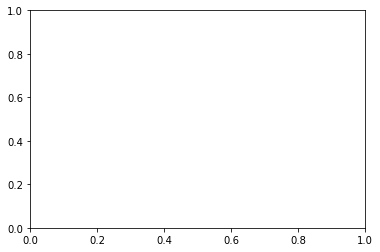

In [5]:
fig, ax = plt.subplots()

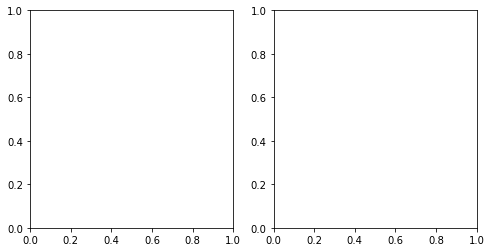

In [6]:
fig, ax = plt.subplots(
    figsize=(8, 4),
    ncols=2,
)

In [7]:
import pandas as pd


url = ("https://raw.githubusercontent.com/ocefpaf/"
       "2018-Jun-SWC-Floripa/master/data")

fname = "dados_pirata.csv"
df = pd.read_csv(
    f"{url}/{fname}",
    index_col='datahora',
    parse_dates=True,
    na_values=-99999,
)

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns = ['{0:0>3}'.format(col.split('_')[1]) for
              col in df.columns]

df.sort_index(axis=1, inplace=True)
df.head(10)

,001,005,010,013,020,040,060,080,100,120,140,180,300,500
datahora,,,,,,,,,,,,,,
2005-08-24 12:00:00+00:00,25.19,NaN,NaN,NaN,25.17,25.17,25.19,25.19,25.20,24.89,23.79,20.60,12.46,6.82
2005-08-25 12:00:00+00:00,25.19,NaN,NaN,NaN,25.18,25.18,25.21,25.18,25.17,24.72,23.61,20.31,12.27,6.85
2005-08-26 12:00:00+00:00,25.26,NaN,NaN,NaN,25.24,25.22,25.20,25.16,25.13,24.74,23.63,20.43,12.36,6.87
2005-08-27 12:00:00+00:00,25.23,NaN,NaN,NaN,25.19,25.19,25.14,25.08,25.04,24.77,23.74,20.10,12.23,6.86
2005-08-28 12:00:00+00:00,25.25,NaN,NaN,NaN,25.21,25.11,25.04,24.99,24.90,24.78,23.81,20.21,12.48,6.79
2005-08-29 12:00:00+00:00,25.33,NaN,NaN,NaN,25.27,25.12,25.03,24.94,24.89,24.43,23.51,19.93,12.29,6.87
2005-08-30 12:00:00+00:00,25.49,NaN,NaN,NaN,25.39,25.33,25.30,25.03,24.84,23.88,23.15,19.93,12.42,6.79
2005-08-31 12:00:00+00:00,25.47,NaN,NaN,NaN,25.43,25.44,25.39,25.16,24.91,23.92,23.22,20.01,12.47,6.88
2005-09-01 12:00:00+00:00,25.47,NaN,NaN,NaN,25.44,25.44,25.46,25.16,24.95,24.60,23.71,20.26,12.38,6.89


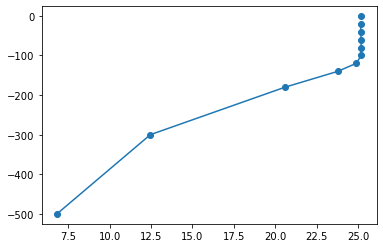

In [9]:
fig, ax = plt.subplots()

z = df.columns.astype(float)

ax.plot(df.iloc[0, :], -z, "-o");


## What are we plotting? Let's label!

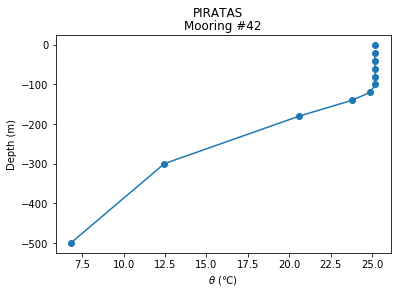

In [10]:
fig, ax = plt.subplots()

ax.plot(df.iloc[0, :], -z, "-o")

fig.suptitle("PIRATAS")
ax.set_title("Mooring #42")
ax.set_xlabel(r"$\theta$ (℃)")
ax.set_ylabel("Depth (m)");

### We can customize the `ticks`...

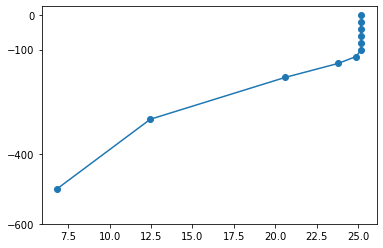

In [11]:
fig, ax = plt.subplots()


ax.plot(df.iloc[0, :], -z, "-o")
ax.set_yticks([0, -100, -400, -600]);

###  ... and the `yticklabels()`.

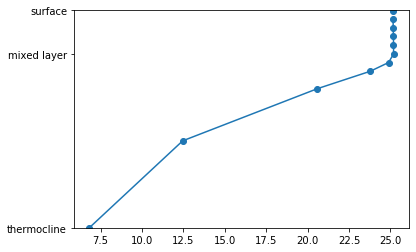

In [12]:
fig, ax = plt.subplots()

ax.plot(df.iloc[0, :], z, "-o")
ax.invert_yaxis()
ax.set_yticks([0, 100, 500]);
ax.set_yticklabels(["surface", "mixed layer", "thermocline"]);

Exercise: We used `df.iloc[0, :]` to  plot the first time index versus the all depths.
Create for a time series (all time indexes) for a single depth and customize it.

ValueError: x and y must have same first dimension, but have shapes (3653,) and (14,)

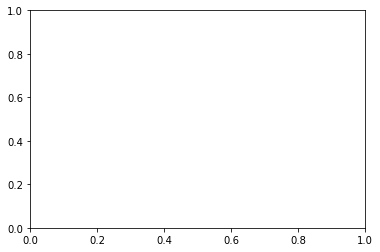

In [13]:
fig, ax = plt.subplots()

z = df.columns.astype(float)

ax.plot(df.iloc[:, 0], -z, "-o");

In [16]:
#ax = df.iloc[:, 0], "-o",


df.plot(df.iloc[:, 0], "-o");

KeyError: "None of [Float64Index([25.19, 25.19, 25.26, 25.23, 25.25, 25.33, 25.49, 25.47, 25.47,\n              25.47,\n              ...\n              25.43,  25.5, 25.52, 25.48, 25.47, 25.48, 25.66,  25.7, 25.63,\n              25.59],\n             dtype='float64', length=3653)] are in the [columns]"

In [20]:
# %load 00-mpl-basics-00-sol.py

### Plotting directly from pandas

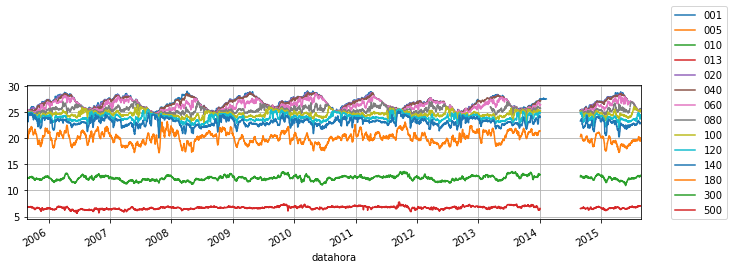

In [17]:
ax = df.plot(figsize=(11, 2.75))
ax.legend(loc=(1.05, 0))
ax.grid(True);

### This allow for a compact processing/plotting code

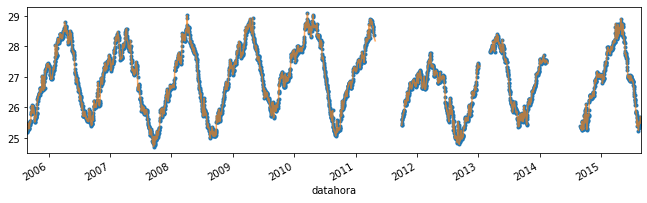

In [18]:
plot = {"marker": ".", "linestyle": "none", "figsize": (11, 3)}
interp = {"method": "time", "limit": 10}

df["001"].plot(**plot);
df["001"].interpolate(**interp).plot(alpha=0.65);

Exercise: check the `plt.subplots` documentation and create a subplot with two rows and 1 column. Plot different depths in the rows.

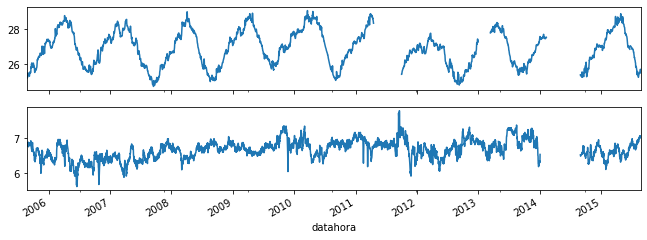

In [24]:


fig, (ax1, ax2) = plt.subplots(
    figsize=(11, 3.75),
    sharex=True,
    nrows=2,
)

df["001"].plot(ax=ax1)
df["500"].plot(ax=ax2)

In [21]:
#%load 00-mpl-basics-01-sol.py

Exercise: load the file `15t30717.3f1` from the `url` below and plot the `u` and `v` time-series.

url = "https://raw.githubusercontent.com/ocefpaf/2018-Jun-SWC-Floripa/master/data/15t30717.3f1"

Note that this dataset is not labeled! (Welcome to the messy world of bad/absent metadata.)

Use `names = ["j", "u", "v", "temp", "sal", "y", "mn", "d", "h", "mi"]` in pandas to identify the columns.

bonus points: filter the tidal signal using pandas `rolling` method.

In [ ]:
%load 00-mpl-basics-02-sol.py

In [ ]:
%load 00-mpl-basics-03-sol.py

### Plotting slices and surfaces

For more examples see <https://ioos.github.io/notebooks_demos/notebooks/2019-03-08-grids-temperature/>.

In [25]:
import xarray as xr


url = ("http://tds.marine.rutgers.edu/thredds/dodsC/"
       "roms/doppio/2017_da/avg/Averages_Best")
ds = xr.open_dataset(url)

In [26]:
temp = ds.filter_by_attrs(
    standard_name="sea_water_potential_temperature"
)
temp.info()

xarray.Dataset {
dimensions:
	eta_rho = 106 ;
	s_rho = 40 ;
	time = 665 ;
	xi_rho = 242 ;

variables:
	float64 temp(time, s_rho, eta_rho, xi_rho) ;
		temp:units = Celsius ;
		temp:long_name = time-averaged potential temperature ;
		temp:time = ocean_time ;
		temp:grid = grid ;
		temp:location = face ;
		temp:field = temperature, scalar, series ;
		temp:_ChunkSizes = [  1  20  53 121] ;
		temp:standard_name = sea_water_potential_temperature ;
	float64 s_rho(s_rho) ;
		s_rho:units =  ;
		s_rho:long_name = S-coordinate at RHO-points ;
		s_rho:valid_min = -1.0 ;
		s_rho:valid_max = 0.0 ;
		s_rho:positive = up ;
		s_rho:standard_name = ocean_s_coordinate_g2 ;
		s_rho:formula_terms = s: s_rho C: Cs_r eta: zeta depth: h depth_c: hc ;
		s_rho:field = s_rho, scalar ;
		s_rho:_CoordinateTransformType = Vertical ;
		s_rho:_CoordinateAxisType = GeoZ ;
		s_rho:_CoordinateZisPositive = up ;
		s_rho:_CoordinateAxes = s_rho ;
	float64 lon_rho(eta_rho, xi_rho) ;
		lon_rho:units = degrees_east ;
		lon_r

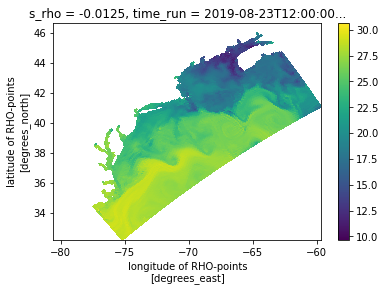

In [27]:
surface = temp.isel(time=-1, s_rho=-1).to_array()

surface.plot(
    x="lon_rho",
    y="lat_rho",
);

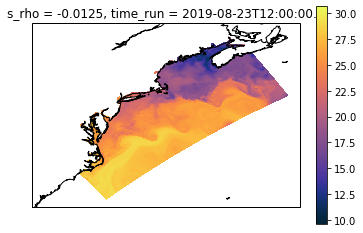

In [29]:
import cartopy.crs as ccrs
from palettable.cmocean.sequential import Thermal_20

cmap = Thermal_20.mpl_colormap

ax = plt.axes(projection=ccrs.PlateCarree())
surface.plot(ax=ax,
             x="lon_rho",
             y="lat_rho",
             cmap=cmap)

ax.coastlines(resolution="10m");

Exercise: change the `isel` call we did above,

```python
temp.isel(time=-1, s_rho=-1).to_array()
```

and create a time-series plot at a certain point and another slice at any given depth. Was it easy to figure out the point and the depth?

Challenge: perform a temperature slice at a given depth (250 m).

In [ ]:
%load 00-mpl-basics-04-sol.py

In [ ]:
%load 00-mpl-basics-05-sol.py

In [ ]:
%load 00-mpl-basics-06-sol.py

Exercise: choose a model from  https://eds.ioos.us, load with `xarray`, and plot a surface layer slice of any property.

### Vertical sections

In [30]:
url = ("http://eds.ioos.us/eds_thredds/dodsC/"
       "EDS/HYCOM_3D_R1/hycom_3d_r1_2019082600.nc")

ds = xr.open_dataset(url, decode_times=False)
section = ds["salinity"].isel(time=0)
section = section.sel(lon=302, method='nearest')

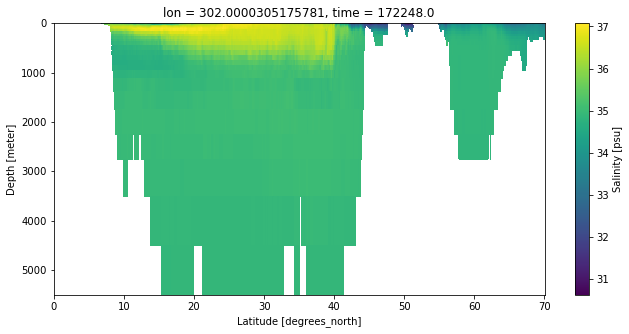

In [31]:
fig, ax = plt.subplots(figsize=(11, 5))
cs = section.plot(ax=ax)
ax.invert_yaxis()

If you need more complex sections, like comparing the path of a glider with a model check [this notebook](https://nbviewer.jupyter.org/gist/ocefpaf/b952cb560f4a508b964825b1b53c78da). You'll notice that it does not use `xarray`, the main reason is the lack of support for vertical coordinates. [More on that on here](https://gist.github.com/ocefpaf/18e8fe29005c148fe0e3).

### Want to know how to perform vertical slices on numerical models?

### This is only be beginning!

There are many tutorials on matplotlib out there. Here are a few resouces:

- https://github.com/matplotlib/GettingStarted
- https://matplotlib.org/gallery.html
- https://github.com/rougier/matplotlib-cheatsheet

In [ ]:
import hvplot.pandas


df[["v", "high", "low"]].hvplot()